In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt


VOC_SIZE = 7881
max_length_sequence = 100

np.random.seed(1)

In [2]:
#importing previously preprocessed and vectorized dataset from preprocessing notebook as pickle file


x = np.load('data.npy')
y = np.load("y.npy")

In [3]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(VOC_SIZE, 32, input_length=max_length_sequence))
    model.add(tf.keras.layers.SimpleRNN(128))
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
    return model

lstm_model = create_model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           252192    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               20608     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 272,929
Trainable params: 272,929
Non-trainable params: 0
_________________________________________________________________


In [4]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("model-{epoch:02d}.h5", save_best_only=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
history = lstm_model.fit(X_train, y_train, epochs = 3, batch_size=16, validation_split=0.25)

Epoch 1/3
209/209 [==============================] - 164s 772ms/step - loss: 0.4964 - accuracy: 0.7696 - val_loss: 0.3673 - val_accuracy: 0.8735
Epoch 2/3
209/209 [==============================] - 175s 841ms/step - loss: 0.4344 - accuracy: 0.8235 - val_loss: 0.2519 - val_accuracy: 0.8762
Epoch 3/3
209/209 [==============================] - 79s 381ms/step - loss: 0.1273 - accuracy: 0.9563 - val_loss: 0.0647 - val_accuracy: 0.9848


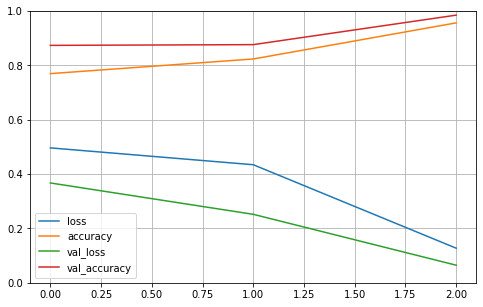

In [7]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
lstm_model.evaluate(X_test, y_test)

35/35 [==============================] - 1s 28ms/step - loss: 0.0783 - accuracy: 0.9821


[0.07829111069440842, 0.9820627570152283]

In [10]:
pred = lstm_model.predict(X_test)>0.5

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.95      0.90      0.93       139

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

